In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import matplotlib.transforms as transforms
import matplotlib.animation as anime
from matplotlib import rcParams
from math import sqrt
rcParams['mathtext.fontset'] = 'stix'
import ipywidgets as widgets
import gif

In [ ]:
def resistance(voltage = '0', current = '0.0'):
    if float(current) == 0:
        print(r'Resistance is N/A.')
    else: 
        print(r'Resistance is {:.2f}Ω.'.format(float(voltage) / float(current)))
widgets.interact(resistance, voltage = widgets.BoundedFloatText(min = 0, max = 110, step = 0.1), current = widgets.BoundedFloatText(min = 0, max = 1, step = 0.01));

## Depo Time

In [ ]:
def FeSe_depo(start = '0', ML = '0', ahead_schedule = '60', preheat = '600'):
    print('Starting from {}secs, monolayer takes {}secs.'.format(int(start) * 2, (int(ML) - int(start)) * 2))
    duration = int((int(ML) - int(start)) * 2 * 1.3)
    minutes = int((duration + int(start) * 2 - int(ahead_schedule) + int(preheat)) // 60)
    seconds = int((duration + int(start) * 2 - int(ahead_schedule)) % 60)
    print(r'1.3ML should take {} second(s), namely, {}min{}secs'.format(duration, minutes, seconds))
widgets.interact(FeSe_depo, start = '0', ML = '0');

## Intensity Log

### Folder Path

In [ ]:
folder_path = '/Users/hunfen/OneDrive/General Files/ゼミー/20201124/20201119/'

### Calculate Intensity Log

In [ ]:
coordinates = np.genfromtxt(folder_path + 'cOordinates.txt', delimiter = ',').astype(int)
IntensityLog = np.zeros(179)
rect_size = (coordinates[0] - coordinates[2]) * (coordinates[1] - coordinates[3])

for i in range(179):
    fig_data = io.imread(folder_path + 'Image' + str(i + 1).zfill(4) + '.jpg')

    for y in range(coordinates[1], coordinates[3]):
        for x in range(coordinates[0], coordinates[2]):
            IntensityLog[i] += fig_data[y][x]
    IntensityLog[i] = IntensityLog[i] / rect_size

### Create Figure

In [ ]:
fig, axis = plt.subplots()
axis.plot(np.linspace(0, 358, 179), IntensityLog, '.', color = 'black')
axis.set_title(r'$\bf{Inetnsity\ Log}$', fontsize =18)
axis.set_xlabel(r'$t\ \mathrm{[s]}$', fontsize = 14)
axis.set_ylabel(r'$Intensity\ \mathrm{[a.u.]}$', fontsize = 14)
axis.set_yticks([])
axis.set_xlim(60, )
# axis.set_ylim(20, 70)

axis.axvline(x = 100, ls = '--', color = 'green')
axis.axvline(x = 350, ls = '--', color = 'red')
axis.text(285, 65,r'$3\mathrm{min}$', color = 'black', fontsize = 12)
axis.arrow(280, 70, 0, -20, width = 1.5, length_includes_head = False, head_width = 6, head_length = 3, color = 'black')
axis.text(105, 40, r'$100\ \mathrm{s}$', fontsize =12)
# axis.arrow(90, 120, 30, 0, width = 1.5, color = 'green')
axis.text(325, 40, r'$250\ \mathrm{s}$', fontsize =12)
# axis.arrow(380, 120, 30, 0, width = 1.5, color = 'red')
# 
fig.tight_layout();
# fig.savefig('/Users/hunfen/OneDrive/General Files/ゼミー/20201124/IntensityLog.jpg', dpi = 600)

## Oscillation GIF

MovieWriter ffmpeg unavailable; using Pillow instead.


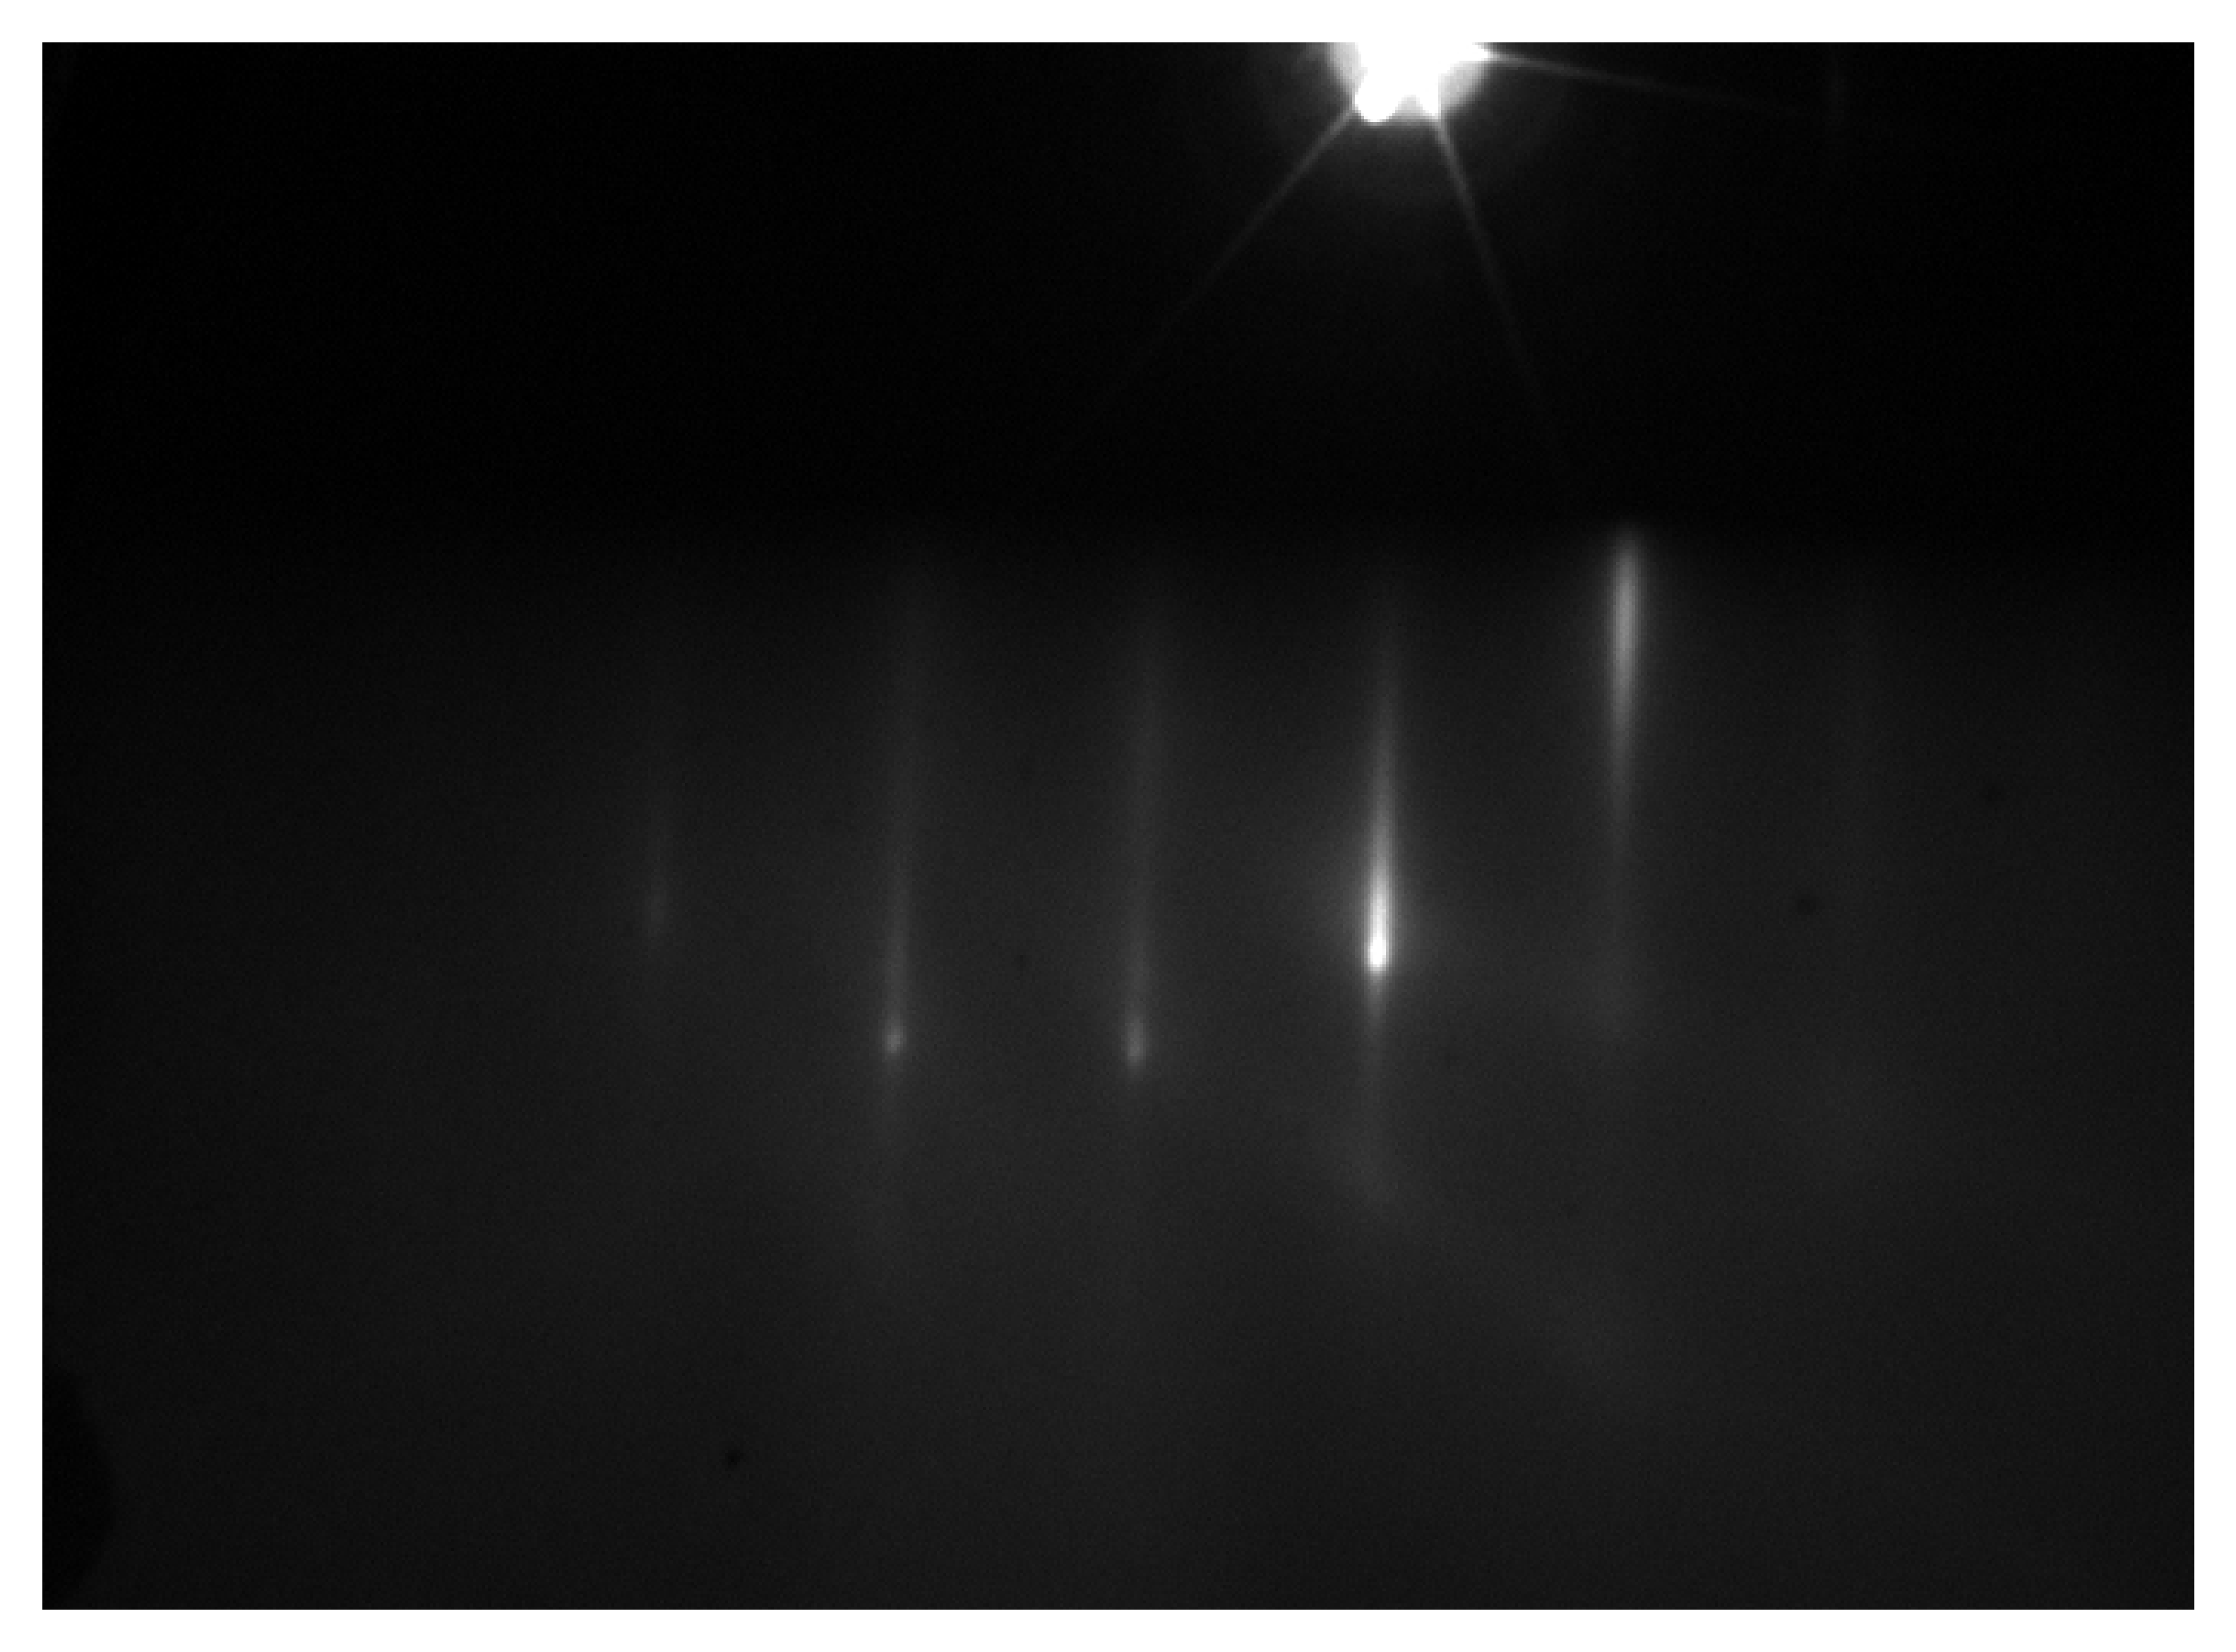

In [49]:
fig = plt.figure(dpi = 600)
plt.axis('off')
fig.tight_layout()
frames = []
for i in range(50, 174):
    fig_data = io.imread(folder_path + 'Image' + str(i + 1).zfill(4) + '.jpg')
    frame = plt.imshow(fig_data[90: 600, 400: 1100], cmap = 'gist_gray')
    frames.append([frame])
ani = anime.ArtistAnimation(fig,
                            frames,
                            interval = 100,
                            blit = True,
                            repeat = False)
ani.save('/Users/hunfen/OneDrive/General Files/ゼミー/20201124/FeSe_1UC_RHEED.gif')